# ОТКРЫВАЕМ JSON-ФАЙЛ

→ Чтобы перевести данные из формата JSON в формат, который можно обрабатывать инструментами Python, необходимо выполнить процедуру, которая называется десериализация (декодирование данных). Обратный процесс, связанный с переводом структур данных Python в формат JSON, называется сериализацией.

Для выполнения десериализации мы воспользуемся методом load() (от англ. загрузить) модуля json, который принимает на вход ссылку на открытый JSON-файл:

In [20]:
import pandas as pd
import os.path
import codecs
import json
from pprint import pprint

In [22]:
# Открываем файл и связываем его с объектом "f"
with open('data/recipes.json') as f:  
    # Загружаем содержимое открытого файла в переменную recipes  
    recipes = json.load(f)
    
#Отлично! Теперь содержимое нашего файла загружено в переменную recipes. Давайте выведем его на экран с помощью функции pprint() из одноимённого модуля:

pprint(recipes)

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
                  'black olives',
                  'grape tomatoes',
                  'garlic',
                  'pepper',
                  'purple onion',
                  'seasoning',
                  'garbanzo beans',
                  'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
                  'ground pepper',
                  'salt',
                  'tomatoes',
                  'ground black pepper',
                  'thyme',
                  'eggs',
                  'green tomatoes',
                  'yellow corn meal',
                  'milk',
                  'vegetable oil']},
 {'cuisine': 'filipino',
  'id': 20130,
  'ingredients': ['eggs',
                  'pepper',
                  'salt',
                  'mayonaise',
                  'cooking oil',
                  'green chilies',
                  'grilled chicken bre

Просматривать их все не нужно, главное — понять общую структуру объекта recipes:

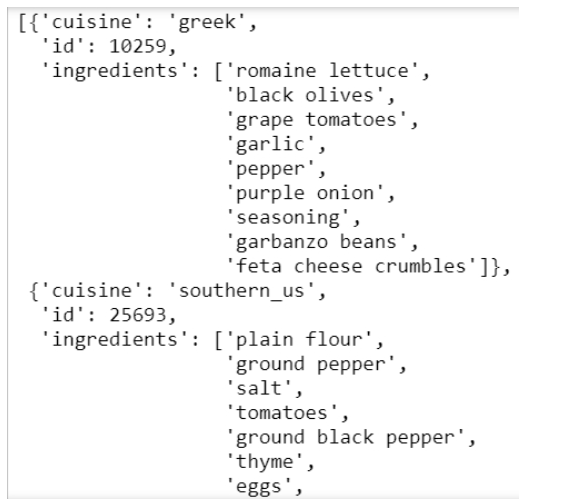

Итак, мы видим, что рецепт каждого из блюд описан в виде словаря, который состоит из трёх пар "ключ-значение":

- Ключ "cuisine" — обозначает принадлежность блюда к определённой национальной кухне (например, 'greek', 'southern_us', 'filipino' и т. д.);

- Ключ "id" — уникальный идентификационный номер блюда;

- Ключ "ingredients"— содержит перечень продуктов, входящих в состав блюда.

Все рецепты (то есть все словари) хранятся в одном списке, располагаясь последовательно.

# ИЗВЛЕКАЕМ ДАННЫЕ ИЗ JSON-ФАЙЛА

После того как мы провели десериализацию данных из JSON-файла, мы можем работать с полученным объектом как с обычными списками и словарями. Единственное отличие этой работы от манипуляций с привычными нам списками и словарями заключается в том, что данных теперь больше и они помещены внутрь структуры с большим количеством уровней вложенности.

Давайте выясним некоторые детали о блюде, которое записано первым в списке блюд. Его индекс — 0, и информация о нём хранится в словаре. Чтобы узнать ID этого блюда, мы можем обратиться к соответствующему ключу словаря, выполнив следующий код:

In [26]:
recipes[0]['id']

10259

Здесь мы сначала извлекаем из списка первый элемент (индекс 0). Поскольку каждый элемент списка является словарём, для получения нужной информации о конкретном блюде нам нужно указать ключ словаря. ID блюда доступно по ключу 'id', и мы указываем этот ключ в отдельной паре квадратных скобок:

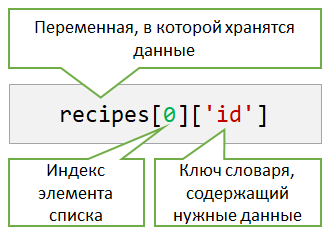

Аналогичным образом, для получения списка ингредиентов первого блюда в списке мы можем использовать тот же код, заменив в нём ключ 'id' на 'ingredients'. 

### Задание 5.1

Сколько ингредиентов входят в состав первого блюда из предлагаемого списка?

In [28]:
len(recipes[0]['ingredients'])

9

### Мы также можем извлечь информацию о конкретном блюде по его ID. Для этого необходимо с помощью цикла, например for, перебрать все элементы списка, проверяя ключ 'id',  и извлечь нужную информацию, когда мы наконец найдем нужное блюдо.

### Задание 5.2

К какой кухне относится блюдо с id = 13121?

In [59]:
for i in recipes:
    if i['id'] == 13121:
        print(i['cuisine'])
        break

thai


### Задание 5.3

На практике также иногда возникают задачи по извлечению из JSON-файла обобщённой информации. Давайте попробуем решить две такие задачи.

Какое количество уникальных национальных кухонь присутствуют в нашем наборе данных?

#### Вариант решения с использованием списка:

Чтобы извлечь эту информацию, нам нужно создать пустой список и последовательно заполнять его уникальными значениями, доступными по ключу 'cuisine' в каждом из словарей, содержащих информацию о рецептах. Поскольку словари объединены в список recipes, не получится применить известный нам метод unique() (этот метод неприменим к словарям), и для извлечения всех уникальных значений нужно перебирать элементы списка в цикле с параметром.

#### Вариант решения с использованием множества:

Другой способ решения этой же задачи — использование для хранения данных о разных кухнях не списка, а множества (set). Множество содержит только уникальные элементы, поэтому при работе с ним нет необходимости проверять, содержится ли там тот или иной элемент. Если элемент (в нашем примере — название типа кухни) уже есть, то команда "добавить во множество такое же значение" будет проигнорирована компьютером.

In [74]:
cuisine= []
for i in recipes:
    cuisine.append(i['cuisine'])
print(len(set(cuisine)))

20


In [76]:
#Возможные варианты решения:
                    
# Используя список        
import json # Импортируем модуль json
from pprint import pprint # Импортируем функцию pprint()
with open('data/recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes
cuisines = [] # создаём пустой список для хранения уникальных значений кухонь
for recipe in recipes: # начинаем перебор всех рецептов
    if not(recipe['cuisine'] in cuisines): # если тип кухни текущего блюда ещё не встречался
        cuisines.append(recipe['cuisine']) # добавляем его к списку cuisines
len(cuisines) # Выводим на экран полученное значение
            
# Используя множество
import json # Импортируем модуль json
from pprint import pprint # Импортируем функцию pprint()
with open('data/recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes
cuisines = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    cuisines.add(recipe['cuisine']) # добавляем название типа кухни к множеству
len(cuisines) # Выводим на экран полученное значение

20

### Задание 5.4

Какой из национальных кухонь принадлежит самое большое количество рецептов?

In [99]:
cusine_count = {}
for i in cuisine:
    if i not in cusine_count:
        cusine_count[i] = 0
    else:
        cusine_count[i] += 1

#Нахождение максимума Вариант 1        
max_val = max(cusine_count.values())
final_dict = {k:v for k, v in cusine_count.items() if v == max_val}
print(final_dict)


#Нахождение максимума Вариант 2
print(sorted(cusine_count.items(),  key = lambda item:item[1], reverse=True))

{'italian': 100}
[('italian', 100), ('mexican', 78), ('southern_us', 51), ('indian', 40), ('chinese', 38), ('french', 24), ('japanese', 23), ('korean', 20), ('thai', 16), ('cajun_creole', 15), ('greek', 14), ('spanish', 11), ('filipino', 10), ('british', 8), ('vietnamese', 8), ('irish', 8), ('moroccan', 8), ('jamaican', 5), ('brazilian', 2), ('russian', 1)]


In [100]:
# Возможный вариант решения:
                    
import json # Импортируем модуль json
from pprint import pprint # Импортируем функцию pprint()
with open('data/recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes
cuisines = [] # Создаём пустой список для хранения уникальных значений кухонь
for recipe in recipes: # Начинаем перебор всех рецептов
    if not(recipe['cuisine'] in cuisines): # Если тип кухни текущего блюда ещё не встречался
        cuisines.append(recipe['cuisine']) # Добавляем его к списку cuisines
valreccuisine = {} # Создаём пустой словарь для хранения информации об количествах рецептов в каждой кухне
for item in cuisines: # Перебираем список кухонь
    valreccuisine[item] = 0 # Добавляем в словарь ключ, соответствующий очередной кухне
for recipe in recipes: # Перебираем список рецептов
    valreccuisine[recipe['cuisine']] += 1 # Увеличиваем значение нужного ключа в словаре на 1
            
print(max(valreccuisine, key=valreccuisine.get)) # Извлекаем значения для всех ключей используя метод get(), выбираем самое максимальное значение (при наличии одинаковых значений будет выбрано первое в словаре) и выводим на экран ключ максимального значения

italian
